# Example Wilcoxon Sign-Ranked Test

Author(s): Miguel Xochicale @mxochicale    
Contributor(s): 

## Running notebook
```
conda activate simpleVE
jupyter notebook --browser=firefox
```
## Logbook
* 04March2023: Create notebook 
    
## References:
* https://pythonfordatascienceorg.wordpress.com/wilcoxon-sign-ranked-test-python/
* https://www.reneshbedre.com/blog/mann-whitney-u-test.html
* https://www.marsja.se/how-to-perform-mann-whitney-u-test-in-python-with-scipy-and-pingouin/
* https://pingouin-stats.org/build/html/index.html


In [17]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import pingouin



In [3]:
df = pd.read_csv("blood_pressure.csv")

df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


In [4]:
df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


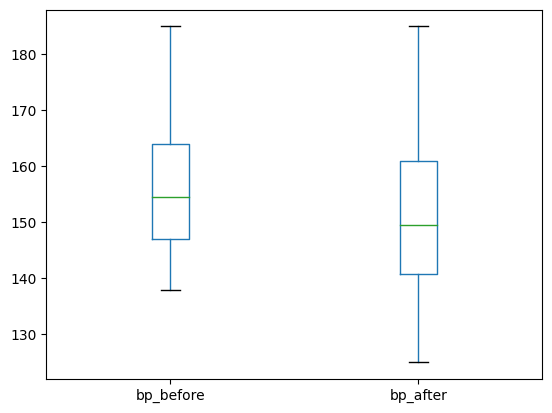

In [5]:
# There doesn’t appear to be any significant outliers in the variables.
df.boxplot(column=['bp_before', 'bp_after'], grid=False)
plt.show()

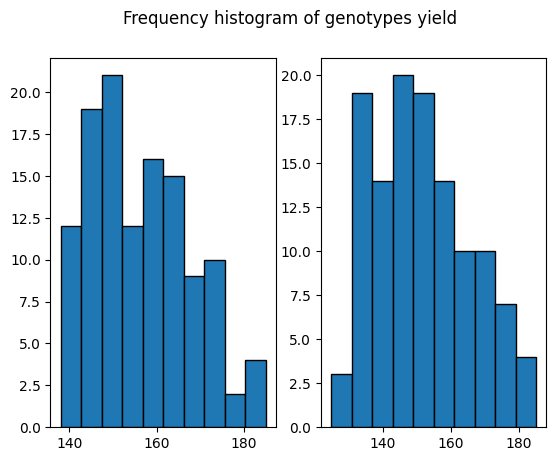

In [11]:
# The histograms of our data does not seem to be normally distributed. There looks to be some skew.
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Frequency histogram of genotypes yield')
ax1.hist(df['bp_before'], bins=10, histtype='bar', ec='k') 
ax2.hist(df['bp_after'], bins=10, histtype='bar', ec='k') 
# ax1.set_xlabel("Yield")
# ax2.set_xlabel("Yield")
plt.show()

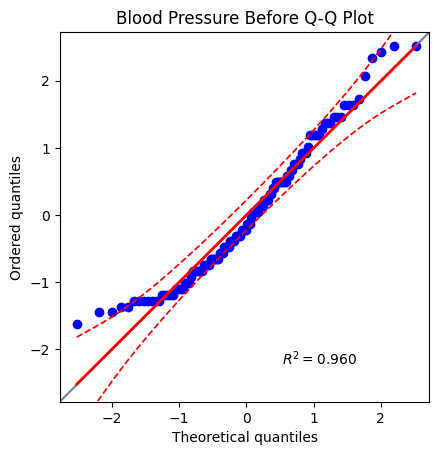

In [19]:
# stats.probplot(df['bp_before'], dist="norm", plot=plt)
pingouin.qqplot(df['bp_before'], dist='norm')
plt.title("Blood Pressure Before Q-Q Plot")
plt.show()


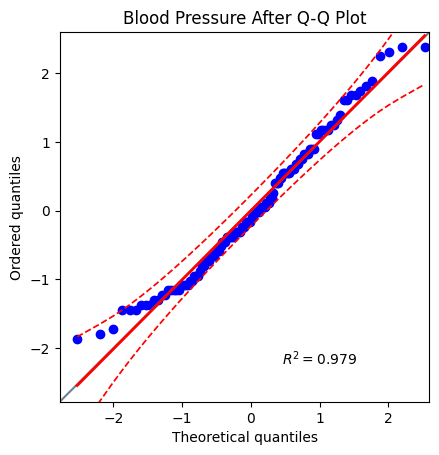

In [20]:
# stats.probplot(df['bp_after'], dist="norm", plot=plt)
pingouin.qqplot(df['bp_after'], dist='norm')
plt.title("Blood Pressure After Q-Q Plot")
plt.show()

In [6]:
stats.shapiro(df['bp_before'])


ShapiroResult(statistic=0.9547789096832275, pvalue=0.0004928590497002006)

In [7]:
stats.shapiro(df['bp_after'])


ShapiroResult(statistic=0.974064290523529, pvalue=0.02022933028638363)

In [8]:
# Both of the variables have a significant p-value which means each variable violates the assumption of normality. 
# Therefore, the Wilcoxon signed rank test, a.k.a the Wilcoxon T test, is the correct test to use 
# to analyze this data.


In [40]:
stats.wilcoxon(df['bp_before'], df['bp_after'])


WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)

In [48]:
stats.mannwhitneyu(df['bp_before'], df['bp_after'], 
                   use_continuity=True, 
                   alternative='greater'#{'less', 'greater', 'two-sided'}.
                  ) 


MannwhitneyuResult(statistic=8849.0, pvalue=0.0010827532661717826)

In [49]:
pingouin.mwu(df['bp_before'], df['bp_after'], 
            alternative='greater',
            method='exact'
            )



# 'U-val': U-value
# 'alternative': tail of the test : must be one of 'two-sided' (default), 'greater' or 'less'.
# 'p-val': p-value
# 'RBC' : rank-biserial correlation
# 'CLES' : common language effect size
# https://pingouin-stats.org/build/html/generated/pingouin.mwu.html#pingouin.mwu 



,U-val,alternative,p-val,RBC,CLES
MWU,8849.0,greater,0.001042,-0.229028,0.614514


In [10]:
# INTERPRETATION OF THE RESULTS
# A Wilcoxon T test was used to analyze the blood pressure before and after the intervention 
# to test if the intervention had a significant affect on the blood pressure. 
# The blood pressure before the intervention was higher (M= 156.45 ± 11.39 units) 
# compared to the blood pressure post intervention (M= 151.36 ± 14.18 units); 
# there was a statistically significant decrease in blood pressure (t=2,234.5, p= 0.0014).

# Note: Reported as Wilcoxon T test since Scipy.stats.wilcoxon() method reports the T value and not the W value